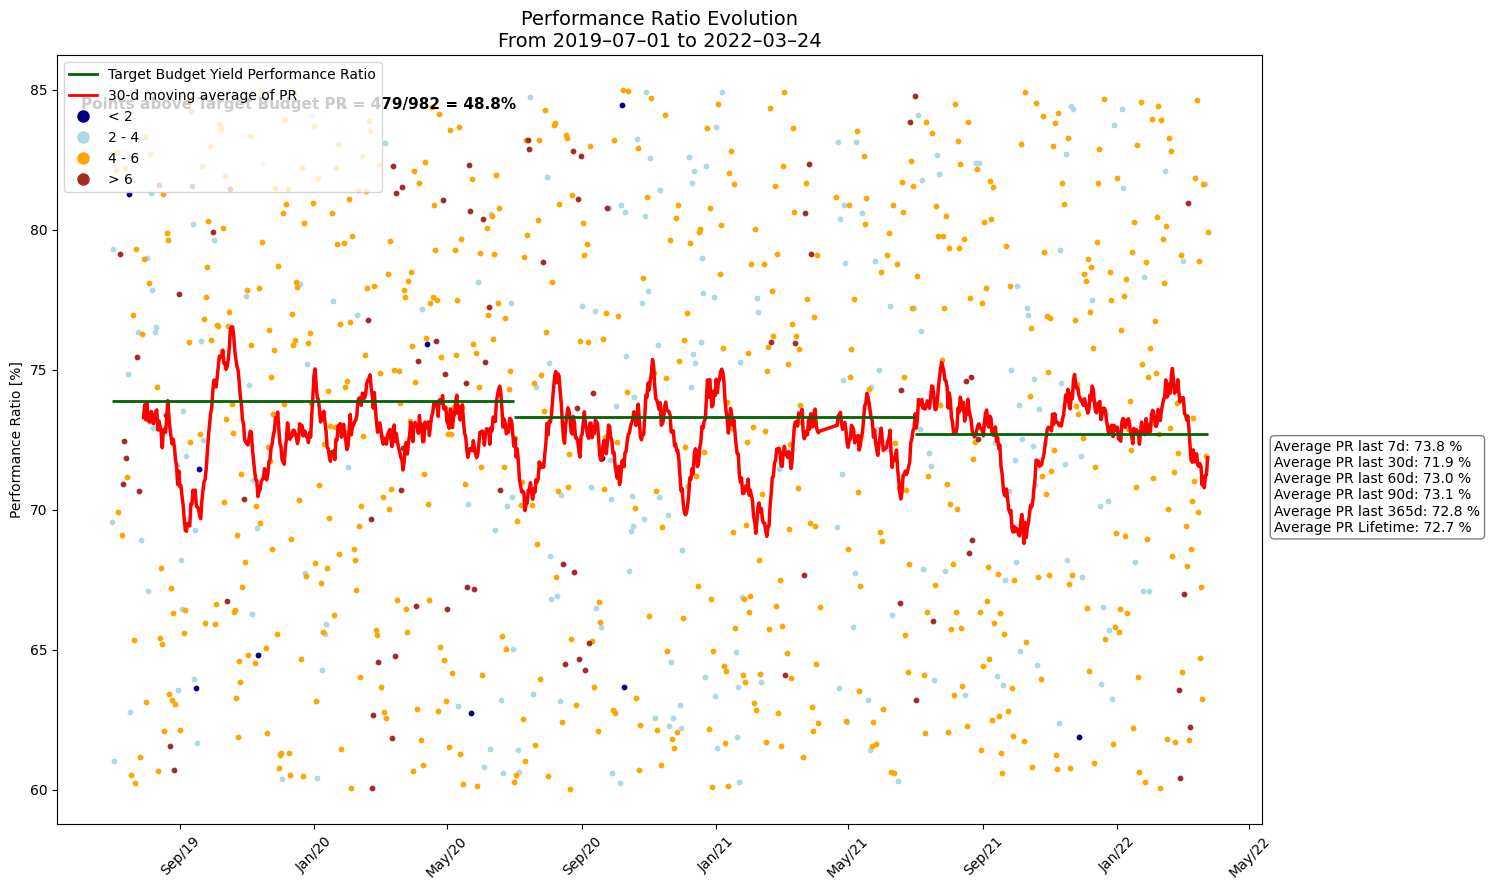

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import numpy as np

# Load the CSV
df = pd.read_csv("GHI_PR_Sorted.csv")  # Make sure the file is in the same directory
df['Date'] = pd.to_datetime(df['Date'])

# 30-day moving average
df['PR_30d_MA'] = df['PR'].rolling(window=30).mean()

# Compute Budget Year dynamically
def compute_budget_year(row, start_year=2019, start_month=7):
    if row.month >= start_month:
        return row.year - start_year
    else:
        return row.year - start_year - 1

df['Budget_Year'] = df['Date'].apply(compute_budget_year)
budget_start_value = 73.9
annual_decrease_rate = 0.008
df['Budget_PR'] = budget_start_value * ((1 - annual_decrease_rate) ** df['Budget_Year'])

# GHI to color
def ghi_to_color(ghi):
    if ghi < 2:
        return 'navy'
    elif 2 <= ghi < 4:
        return 'lightblue'
    elif 4 <= ghi < 6:
        return 'orange'
    else:
        return 'brown'

df['Color'] = df['GHI'].apply(ghi_to_color)

# Plotting Function
def generate_custom_graph(data):
    fig, ax = plt.subplots(figsize=(15, 9))

    # Scatter PR points by color
    for color in ['navy', 'lightblue', 'orange', 'brown']:
        subset = data[data['Color'] == color]
        ax.scatter(subset['Date'], subset['PR'], color=color, label=color, s=10)

    # 30-day moving average line
    ax.plot(data['Date'], data['PR_30d_MA'], color='red', linewidth=2.5, label='30-d moving average of PR')

    # Stepwise budget line
    grouped = data.groupby('Budget_Year').first().reset_index()
    grouped['Budget'] = budget_start_value * ((1 - annual_decrease_rate) ** grouped['Budget_Year'])
    grouped['EndDate'] = grouped['Date'].shift(-1)

    for _, row in grouped.iterrows():
        ax.hlines(row['Budget'], row['Date'], row['EndDate'] if pd.notna(row['EndDate']) else data['Date'].max(),
                  colors='darkgreen', linewidth=2)

    # Title & labels
    ax.set_title("Performance Ratio Evolution\nFrom 2019–07–01 to 2022–03–24", fontsize=14)
    ax.set_ylabel("Performance Ratio [%]")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))
    plt.xticks(rotation=45)

    # Custom Legend
    custom_legend = [
        Line2D([0], [0], color='darkgreen', lw=2, label='Target Budget Yield Performance Ratio'),
        Line2D([0], [0], color='red', lw=2, label='30-d moving average of PR'),
        Line2D([0], [0], marker='o', color='w', label='< 2', markerfacecolor='navy', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='2 - 4', markerfacecolor='lightblue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='4 - 6', markerfacecolor='orange', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='> 6', markerfacecolor='brown', markersize=10),
    ]
    ax.legend(handles=custom_legend, loc='upper left')

    # Points above budget
    points_above = (data['PR'] > data['Budget_PR']).sum()
    total_points = len(data)
    pct = 100 * points_above / total_points
    ax.text(0.02, 0.93, f"Points above Target Budget PR = {points_above}/{total_points} = {pct:.1f}%",
            transform=ax.transAxes, fontsize=11, fontweight='bold')

    # Stats box (bottom right)
    periods = [7, 30, 60, 90, 365]
    labels = [f"Average PR last {n}d" for n in periods]
    values = [data['PR'].tail(n).mean() for n in periods]
    labels.append("Average PR Lifetime")
    values.append(data['PR'].mean())
    stats_text = "\n".join([f"{label}: {val:.1f} %" for label, val in zip(labels, values)])
    ax.text(1.01, 0.5, stats_text, transform=ax.transAxes, verticalalignment='top',
            fontsize=10, bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray'))

    plt.tight_layout()
    plt.show()

# Call the function
generate_custom_graph(df)


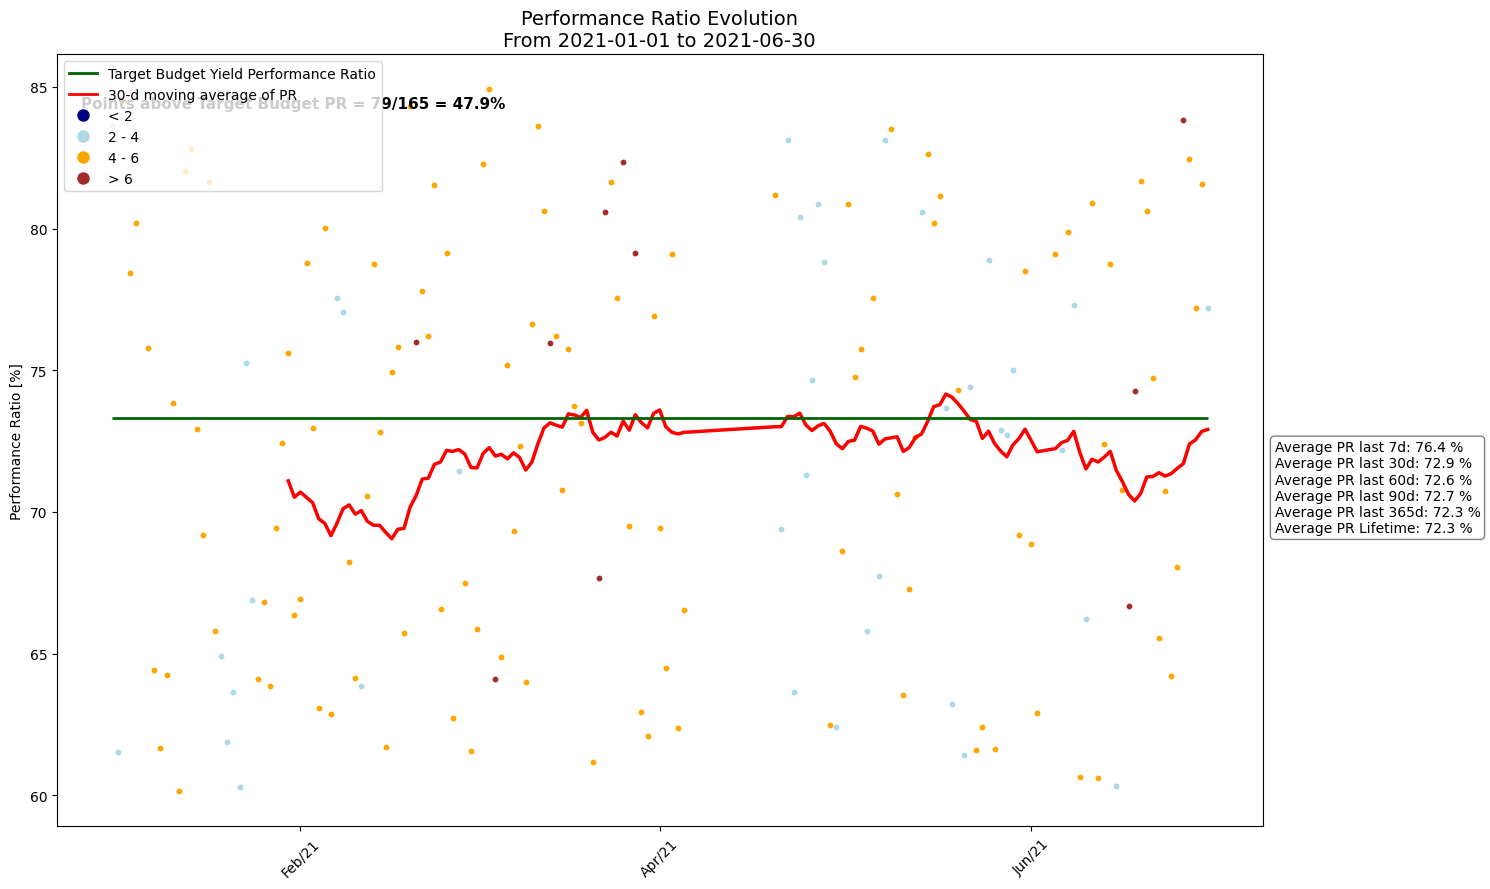

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import numpy as np

def generate_custom_graph(csv_path, start_date=None, end_date=None):
    # Load and preprocess data
    df = pd.read_csv(csv_path)
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter by date range if provided
    if start_date:
        df = df[df['Date'] >= pd.to_datetime(start_date)]
    if end_date:
        df = df[df['Date'] <= pd.to_datetime(end_date)]

    if df.empty:
        print("No data available in the given date range.")
        return

    # 30-day moving average
    df['PR_30d_MA'] = df['PR'].rolling(window=30).mean()

    # Compute Budget Year dynamically
    def compute_budget_year(row, start_year=2019, start_month=7):
        if row.month >= start_month:
            return row.year - start_year
        else:
            return row.year - start_year - 1

    df['Budget_Year'] = df['Date'].apply(compute_budget_year)
    budget_start_value = 73.9
    annual_decrease_rate = 0.008
    df['Budget_PR'] = budget_start_value * ((1 - annual_decrease_rate) ** df['Budget_Year'])

    # GHI to color
    def ghi_to_color(ghi):
        if ghi < 2:
            return 'navy'
        elif 2 <= ghi < 4:
            return 'lightblue'
        elif 4 <= ghi < 6:
            return 'orange'
        else:
            return 'brown'

    df['Color'] = df['GHI'].apply(ghi_to_color)

    # Plotting
    fig, ax = plt.subplots(figsize=(15, 9))

    # Scatter PR points by color
    for color in ['navy', 'lightblue', 'orange', 'brown']:
        subset = df[df['Color'] == color]
        ax.scatter(subset['Date'], subset['PR'], color=color, label=color, s=10)

    # 30-day moving average line
    ax.plot(df['Date'], df['PR_30d_MA'], color='red', linewidth=2.5, label='30-d moving average of PR')

    # Stepwise budget line
    grouped = df.groupby('Budget_Year').first().reset_index()
    grouped['Budget'] = budget_start_value * ((1 - annual_decrease_rate) ** grouped['Budget_Year'])
    grouped['EndDate'] = grouped['Date'].shift(-1)

    for _, row in grouped.iterrows():
        ax.hlines(row['Budget'], row['Date'], row['EndDate'] if pd.notna(row['EndDate']) else df['Date'].max(),
                  colors='darkgreen', linewidth=2)

    # Title
    title_range = f"{df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}"
    ax.set_title(f"Performance Ratio Evolution\nFrom {title_range}", fontsize=14)
    ax.set_ylabel("Performance Ratio [%]")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))
    plt.xticks(rotation=45)

    # Legend
    custom_legend = [
        Line2D([0], [0], color='darkgreen', lw=2, label='Target Budget Yield Performance Ratio'),
        Line2D([0], [0], color='red', lw=2, label='30-d moving average of PR'),
        Line2D([0], [0], marker='o', color='w', label='< 2', markerfacecolor='navy', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='2 - 4', markerfacecolor='lightblue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='4 - 6', markerfacecolor='orange', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='> 6', markerfacecolor='brown', markersize=10),
    ]
    ax.legend(handles=custom_legend, loc='upper left')

    # Points above budget
    points_above = (df['PR'] > df['Budget_PR']).sum()
    total_points = len(df)
    pct = 100 * points_above / total_points
    ax.text(0.02, 0.93, f"Points above Target Budget PR = {points_above}/{total_points} = {pct:.1f}%",
            transform=ax.transAxes, fontsize=11, fontweight='bold')

    # Stats box
    periods = [7, 30, 60, 90, 365]
    labels = [f"Average PR last {n}d" for n in periods]
    values = [df['PR'].tail(n).mean() for n in periods]
    labels.append("Average PR Lifetime")
    values.append(df['PR'].mean())
    stats_text = "\n".join([f"{label}: {val:.1f} %" for label, val in zip(labels, values)])
    ax.text(1.01, 0.5, stats_text, transform=ax.transAxes, verticalalignment='top',
            fontsize=10, bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray'))

    plt.tight_layout()
    plt.show()

# Example usage
generate_custom_graph("GHI_PR_Sorted.csv", start_date="2021-01-01", end_date="2021-06-30")
